In [1]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.mlab import griddata
import numpy as np
from scipy.stats import norm
import sfdmap
from astroquery.vizier import Vizier
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [2]:
# def findPrior(r,l,b):
#     l = np.linspace(0., 360., noStepsAngle)
#     xlen = (((r*np.cos(np.deg2rad(l)))-8))
#     ylen = ((r*np.sin(np.deg2rad(l))))
#     dist = ((xlen**2)+(ylen**2))**0. 

#     rogrim = 1
#     rtgrim = 1.9
#     rdgrim = 3.5
#     rzgrim = 0.41
#     rmgrim = 6.5
#     gamma = 1.8
#     bulge = 0.66
#     disc = 0.33

#     rowmv = ((bulge*((dist/rogrim)**gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
#     rowob = 
    
#     P = r**2*rowmw*rowob
#     return P

In [43]:
def newWeight(noSteps,fullPeriod,rM,satMag=5.7,limMag=21):
    bayestar = BayestarQuery(max_samples=2)
    ebv=[]
    ebv1d = []
    m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 0.66
    disc = 0.33
    q = 0.6
    distance = np.linspace(1,30.1,noSteps)
    
    
    number = 0
    l = np.linspace(0., 360., noSteps)
    b = np.linspace(0., 180., (noSteps/2))
    R = 2.273
#     for z, bangle in enumerate(b):
#         for i,x in enumerate(l):
#             ebvPerD = []
#             for d,dis in enumerate(distance):
#                 coords = SkyCoord(x*units.deg, bangle*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                 ebvPerD.append(bayestar(coords, mode='median'))
#             string = str(ebvPerD)
#             if 'nan' in string:
#                 if number == 0:
#                     startNan = i
#                 ebvPerD = []
#                 number += 1
#                 for d,dis in enumerate(distance):
#                     angle = startNan-(x-startNan)
#                     coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                     ebvPerD.append(bayestar(coords, mode='median'))
#             ebv.append(ebvPerD)

    mag = []
    #test = {}
#     for y in range(len(l)):
#         magperanlge = []
#         for x,item in enumerate(distance): 
#             magperanlge.append((5*np.log10((item*(1000/10)))+rM)+((ebv[y][x])*R))
#             #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
#         mag.append(magperanlge)
        
    totmag, totmaglist, brightProfile, brightProfilelist = [],[],[],[]
    xtotal, xlist, ytotal, ylist = [],[],[],[]
    Rd = 3 #kpc
    counter = 0
    othercounter = 0
    prior = []
    Prior = []
    anglesNew = []
    distNew = []
    brightProfilelist = []
    magProbs = []
    for z,bangle in enumerate(b):
        for x,angle in enumerate(l):        
            #prior = []
            smallDist = []
            smallAngle = []
            #xtotal = []
            #ytotal = []
            for y,item in enumerate(distance):
                dists = item*np.cos(np.deg2rad(bangle))
                xlen = (((dists*np.cos(np.deg2rad(l[x])))-8))
                ylen = ((dists*np.sin(np.deg2rad(l[x]))))
                z = item*np.cos(np.deg2rad(l[x]))
                if xlen**2+ylen**2 < 15**2:
                    xtotal.append(xlen)
                    ytotal.append(ylen)
                    #totmaglist.append(mag[x][y])
                    dist = ((xlen**2)+(ylen**2))**0.5
                    smallDist.append(dist)
                    smallAngle.append(l)
                    #brightProfilelist.append(np.exp(-(dist/Rd)))
                    bp = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
                    brightProfilelist.append(bp)
                    othercounter += 1
                    magProb = 1
#                     if mag[x][y] > satMag and mag[x][y] < limMag:
#                         magProb = 1
#                     else:
#                         magProb = 0
#                     magProbs.append(magProb)
                    prior.append((item**2)*bp*magProb)
                

        xlist.append(xtotal)
        ylist.append(ytotal)
        #totmag.append(totmaglist)
        anglesNew.append(smallAngle)
        distNew.append(distNew)
        brightProfile.append(brightProfilelist)
        #Prior.append(prior)
#     sumbp = sum(brightProfilelist)
#     summp = sum(magProbs)
#     normBp = [x/sumbp for x in brightProfilelist]
#     priorSum = sum(prior)
#     #Prior = [x for x in prior]
#     Prior = [x/(sumbp*sumbp) for x in prior]
#     #print(totmag)
#     print('xlist - ', xlist)
#     print('ylist - ', ylist)#
#     print('Prior - ', newPrior)
    #im = plt.pcolor(xlist,ylist,newPrior,cmap='plasma_r',vmin=0,vmax=1)
    def grid(x, y, z, resX=100, resY=100):
        "Convert 3 column data to matplotlib grid"
        xi = np.linspace(min(x), max(x), resX)
        yi = np.linspace(min(y), max(y), resY)
        Z = griddata(x, y, z, xi, yi,interp='linear')
        X, Y = np.meshgrid(xi, yi)
        return X, Y, Z

#     X, Y, Z = grid(xtotal, ytotal, magProbs)#Prior)
#     plt.contourf(X, Y, Z)
#     plt.colorbar(label='Prior')
#     plt.xlabel('Distance (kpc)')
#     plt.ylabel('Distance (kpc)')
#     plt.show()  
#     im = plt.pcolor(X,Y,Z,cmap='plasma_r')
#     plt.colorbar(im)
#     plt.show()
    
    X, Y, Z = grid(xtotal, ytotal,Prior)
    plt.contourf(X, Y, Z)
    plt.colorbar(label='Prior')
    plt.xlabel('Distance (kpc)')
    plt.ylabel('Distance (kpc)')
    plt.show()  
    im = plt.pcolor(X,Y,Z,cmap='plasma_r')
    plt.colorbar(im)
    plt.show()
    
    return Prior

In [44]:
x = newWeight(31,0,3.5)

ValueError: x, y and z must be equal-length 1-D arrays

In [ ]:
def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi,interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(xlist[0], ylist[0], totmag[0])
plt.contourf(X, Y, Z)
plt.colorbar(label='Magnitude')
plt.xlabel('Distance (kpc)')
plt.ylabel('Distance (kpc)')
plt.show()


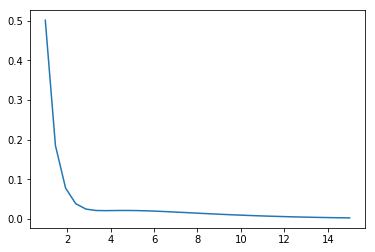

[0.50068464449674799, 0.1851227352067468, 0.078120100320084124, 0.038762198692922342, 0.025245928445631755, 0.021595130176382118, 0.021236244453265003, 0.021568173542618273, 0.021697912546357449, 0.02141868706526975, 0.020763116809774777, 0.019825460973024258, 0.018700245978287029, 0.017465627627557902, 0.016181684299789372, 0.014892807670250044, 0.013630753170083831, 0.012417413003802589, 0.01126712289982649, 0.010188516488799641, 0.0091859895106192278, 0.0082608419794365749, 0.0074121604720316179, 0.0066374936464834557, 0.0059333648683148965, 0.005295657476608007, 0.0047199010916148375, 0.0042014814625586962, 0.0037357915631272593, 0.0033183378024992161, 0.0029448121689112116]


In [67]:
rogrim = 1.
rtgrim = 1.9
rdgrim = 3.5
rzgrim = 0.41
rmgrim = 6.5
gamma = 1.8
bulge = 0.66
disc = 0.33    
r = np.linspace(1,15,31)
bp = []
for x,dist in enumerate(r):
    bp.append((bulge*((dist/rogrim)**-gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
plt.plot(r,bp)
plt.show()
print(bp)

In [24]:
l = np.linspace(0., 360., 61)
distance = np.linspace(0.1,30.1,61)
im = plt.pcolor(l,distance,newPrior,cmap='plasma_r',vmin=0,vmax=1)

ValueError: need more than 1 value to unpack

In [49]:
def newPrior(l,b,r,realDistance):
    cumulative = []
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 2
    disc = 1
    sphere = 0.8
    Rc = 2.8
    q = 0.6
    b = 7.669
    satMag = 5.7
    limMag = 21
    brightProfilelist = []
    prior = []
    ebv = []
    bayestar = BayestarQuery(max_samples=2)
    rM = 3.5
    R = 3.1
    #R = 2.273
    ohDear = 0
    for x,dis in enumerate(r):
        coords = SkyCoord(l*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
        bae = bayestar(coords, mode='median')
        string = str(bae)
        if 'nan' in string:
            coords = SkyCoord((360-l)*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
            ebv.append(bayestar(coords, mode='median'))
            #string = str(ebv)
            if ohDear == 0:
                print('Oh Dear')
                ohDear += 1
        else:
            ebv.append(bae)
#             if number == 0:
#                 startNan = i
#             ebvPerD = []
#             number += 1
#             for d,dis in enumerate(r):
#                 angle = startNan-(x-startNan)
#                 coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                 ebvPerD.append(bayestar(coords, mode='median'))

    mag = []
    #test = {}
    magperanlge = []
    for x,item in enumerate(r): 
        mag.append((5*np.log10((item*(1000/10)))+rM)+((ebv[x])*R))
        #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
    #mag.append(magperanlge)
    
    for x,item in enumerate(r):
        #dists = item*np.cos(np.deg2rad(b))
        xlen = (((item*np.cos(np.deg2rad(l)))-8))*np.cos(np.deg2rad(b))
        ylen = ((item*np.sin(np.deg2rad(l))))*np.cos(np.deg2rad(b))
        z = item*np.cos(np.deg2rad(l))*np.sin(np.deg2rad(b))
        dist = ((xlen**2)+(ylen**2))**0.5
        R = ((dist**2)+(x**2))**0.5
        Bulge = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))
        Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        Sphere = (sphere*(np.exp(-b*((R/Rc)**0.25))))/((R/Rc)**(7/8))
        #bp = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        bp = Bulge + Disc + Sphere
        brightProfilelist.append(bp)
        if mag[x] > satMag and mag[x] < limMag:
            magProb = 1
        else:
            magProb = 0
        #magProbs.append(magProb)
        #print(bp)
        prior.append((x**2)*bp*magProb)
        if len(cumulative) != 0:
            cumulative.append(((x**2)*bp*magProb)+cumulative[-1])
        else:
            cumulative.append((x**2)*bp*magProb)
    #print(prior)
    maximus = max(prior)
    print(len(cumulative))
    Cumulative = [x/cumulative[-1] for x in cumulative]
    prior = [(x/maximus) for x in prior]    

    modeval = prior.index(max(prior))
    print(modeval)
    mode = r[modeval]
    print(mode)
    #print cumulative
    medianlist = [((0.5-x)**2) for x in Cumulative]
    #print(medianlist)
    medianNo = (medianlist.index(min(medianlist)))
    print(medianNo)
    median = r[medianNo]
    print(median)
    
    plt.plot(r,prior)
    #plt.xscale('log')
    plt.plot([mode,mode],[0,1],label='mode')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    
    plt.plot(r,Cumulative)
    plt.plot([median,median],[0,1],label='median')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    #plt.xscale('log')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    DistList = [median,mode]
    return DistList

In [50]:
def newPriorNoSphere(l,b,r,realDistance):
    cumulative = []
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 2
    disc = 1
    sphere = 0.8
    Rc = 2.8
    q = 0.6
    b = 7.669
    satMag = 5.7
    limMag = 21
    brightProfilelist = []
    prior = []
    ebv = []
    bayestar = BayestarQuery(max_samples=2)
    rM = 3.5
    R = 3.1
    #R = 2.273
    ohDear = 0
    for x,dis in enumerate(r):
        coords = SkyCoord(l*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
        bae = bayestar(coords, mode='median')
        string = str(bae)
        if 'nan' in string:
            coords = SkyCoord((360-l)*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
            ebv.append(bayestar(coords, mode='median'))
            #string = str(ebv)
            if ohDear == 0:
                print('Oh Dear')
                ohDear += 1
        else:
            ebv.append(bae)
#             if number == 0:
#                 startNan = i
#             ebvPerD = []
#             number += 1
#             for d,dis in enumerate(r):
#                 angle = startNan-(x-startNan)
#                 coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                 ebvPerD.append(bayestar(coords, mode='median'))

    mag = []
    #test = {}
    magperanlge = []
    for x,item in enumerate(r): 
        mag.append((5*np.log10((item*(1000/10)))+rM)+((ebv[x])*R))
        #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
    #mag.append(magperanlge)
    
    for x,item in enumerate(r):
        #dists = item*np.cos(np.deg2rad(b))
        xlen = (((item*np.cos(np.deg2rad(l)))-8))*np.cos(np.deg2rad(b))
        ylen = ((item*np.sin(np.deg2rad(l))))*np.cos(np.deg2rad(b))
        z = item*np.cos(np.deg2rad(l))*np.sin(np.deg2rad(b))
        dist = ((xlen**2)+(ylen**2))**0.5
        R = ((dist**2)+(x**2))**0.5
        Bulge = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))
        Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        Sphere = (sphere*(np.exp(-b*((R/Rc)**0.25))))/((R/Rc)**(7/8))
        #bp = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        bp = Bulge + Disc# + Sphere
        brightProfilelist.append(bp)
        if mag[x] > satMag and mag[x] < limMag:
            magProb = 1
        else:
            magProb = 0
        #magProbs.append(magProb)
        #print(bp)
        prior.append((x**2)*bp*magProb)
        if len(cumulative) != 0:
            cumulative.append(((x**2)*bp*magProb)+cumulative[-1])
        else:
            cumulative.append((x**2)*bp*magProb)
    #print(prior)
    maximus = max(prior)
    print(len(cumulative))
    Cumulative = [x/cumulative[-1] for x in cumulative]
    prior = [(x/maximus) for x in prior]    

    modeval = prior.index(max(prior))
    print(modeval)
    mode = r[modeval]
    print(mode)
    #print cumulative
    medianlist = [((0.5-x)**2) for x in Cumulative]
    #print(medianlist)
    medianNo = (medianlist.index(min(medianlist)))
    print(medianNo)
    median = r[medianNo]
    print(median)
    
    plt.plot(r,prior)
    #plt.xscale('log')
    plt.plot([mode,mode],[0,1],label='mode')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    
    plt.plot(r,Cumulative)
    plt.plot([median,median],[0,1],label='median')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    #plt.xscale('log')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    DistList = [median,mode]
    return DistList

In [51]:
def newPriorNoMag(l,b,r,realDistance):
    cumulative = []
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 2
    disc = 1
    sphere = 0.8
    Rc = 2.8
    q = 0.6
    b = 7.669
    satMag = 5.7
    limMag = 21
    brightProfilelist = []
    prior = []
    ebv = []
    bayestar = BayestarQuery(max_samples=2)
    rM = 3.5
    R = 3.1
    #R = 2.273
    ohDear = 0

    for x,item in enumerate(r):
        #dists = item*np.cos(np.deg2rad(b))
        xlen = (((item*np.cos(np.deg2rad(l)))-8))*np.cos(np.deg2rad(b))
        ylen = ((item*np.sin(np.deg2rad(l))))*np.cos(np.deg2rad(b))
        z = item*np.cos(np.deg2rad(l))*np.sin(np.deg2rad(b))
        dist = ((xlen**2)+(ylen**2))**0.5
        R = ((dist**2)+(x**2))**0.5
        Bulge = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))
        Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        Sphere = (sphere*(np.exp(-b*((R/Rc)**0.25))))/((R/Rc)**(7/8))
        #bp = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        bp = Bulge + Disc# + Sphere
        brightProfilelist.append(bp)

        prior.append((x**2)*bp)
        if len(cumulative) != 0:
            cumulative.append(((x**2)*bp)+cumulative[-1])
        else:
            cumulative.append((x**2)*bp)
    maximus = max(prior)
    print(len(cumulative))
    Cumulative = [x/cumulative[-1] for x in cumulative]
    prior = [(x/maximus) for x in prior]    

    modeval = prior.index(max(prior))
    print(modeval)
    mode = r[modeval]
    print(mode)
    #print cumulative
    medianlist = [((0.5-x)**2) for x in Cumulative]
    #print(medianlist)
    medianNo = (medianlist.index(min(medianlist)))
    print(medianNo)
    median = r[medianNo]
    print(median)
    
    plt.plot(r,prior)
    #plt.xscale('log')
    plt.plot([mode,mode],[0,1],label='mode')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    
    plt.plot(r,Cumulative)
    plt.plot([median,median],[0,1],label='median')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    #plt.xscale('log')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    DistList = [median,mode]
    return DistList

Oh Dear


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


15


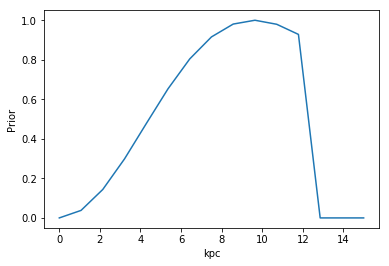

9
9.64285714286
3
3.21428571429


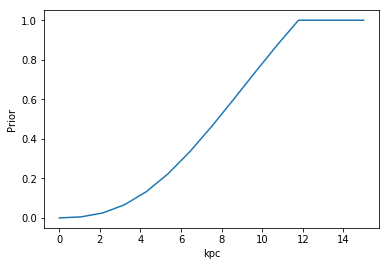

In [29]:
x = newPrior( 275.8786, +09.3459,np.linspace(0.0,15,15))

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


30


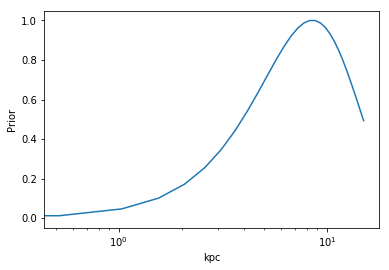

16
8.27586206897
3
1.55172413793


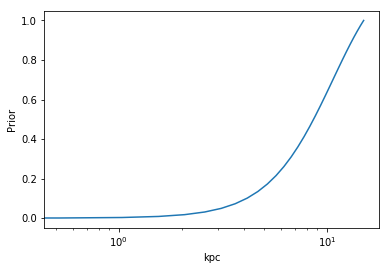

In [194]:
# d = 2.1
x = newPrior(071.3350,+03.0668,np.linspace(0.0,15,60)

In [182]:
r = np.linspace(0.0,15,15)

In [16]:
r[8]

NameError: name 'r' is not defined

In [17]:
print(x[0],x[1])

3.21428571429 9.64285714286


In [30]:
coords = [['04 21 42.790', '+32 54 27.100'],
 ['06 22 44.500', '-00 20 44.720'],
 ['10 13 35.600', '-45 04 35.280'],
 ['11 18 10.790', '+48 02 12.420'],
 ['11 26 26.650', '-68 40 32.830'],
 ['13 57 16.820', '-09 32 38.550'],
 ['13 58 09.700', '-64 44 05.800'],
 ['15 47 08.320', '-47 40 10.800'],
 ['15 50 58.700', '-56 28 35.200'],
 ['16 50 00.980', '-49 57 43.600'],
 ['16 54 00.14', '-39 50 44.90'],
 ['16 59 01.680', '-15 15 28.730'],
 ['17 02 49.400', '-48 47 23.400'],
 ['17 08 15.520', '-25 05 30.150'],
 ['17 52 15.090', '-22 20 32.360'],
 ['17 53 28.290', '-01 27 06.220'],
 ['18 17 43.530', '-33 01 07.570'],
 ['18 19 21.580', '-25 24 25.100'],
 ['18 20 18', '+07 11 35'],
 ['18 58 41.580', '+22 39 29.400'],
 ['19 15 11.550', '+10 56 44.800'],
 ['19 58 21.67595', '+35 12 05.7783'],
 ['20 02 49.480', '+25 14 11.360'],
 ['20 24 03.820', '+33 52 01.900']]

In [31]:
distList = [2.49, 1.0599999, 3.8, 1.7, 5.9000001, 2.29, 25.0, 7.5, 4.5, 2.5999999, 3.2, 8.6000004, 6.0, 8.6000004, 6.0, 6.0, 5.5, 6.1999998, 0, 12.5, 9.0, 2.1, 2.7, 2.3900001]

60


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


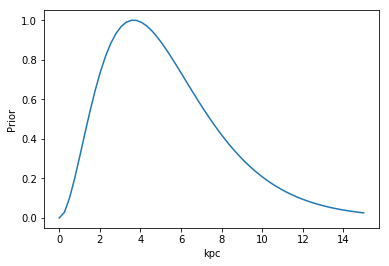

14
3.5593220339
18
4.57627118644


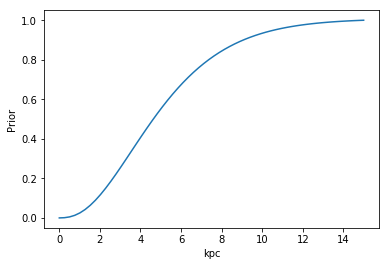

priors [4.5762711864406782, 3.5593220338983049] distance 2.49


In [36]:
gall = []
galb = []

priors = []
for x in range(len(galb)):
    priors.append(newPrior(gall[x],galb[x],np.linspace(0.0,15,60)))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])
                

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


30
7
3.62068965517
9
4.65517241379


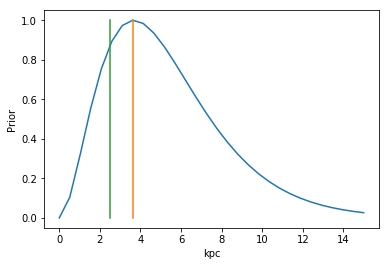

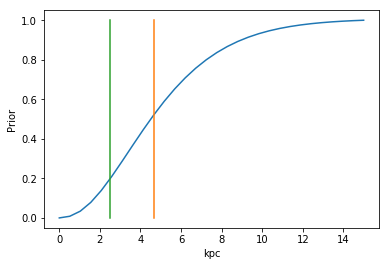

30
7
3.62068965517
9
4.65517241379


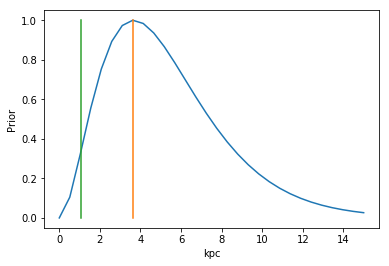

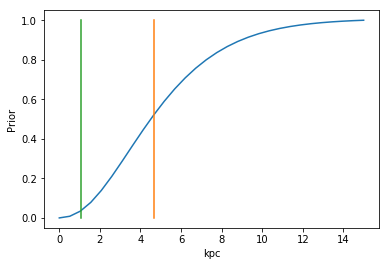

30
8
4.13793103448
9
4.65517241379


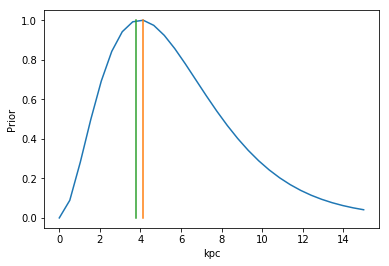

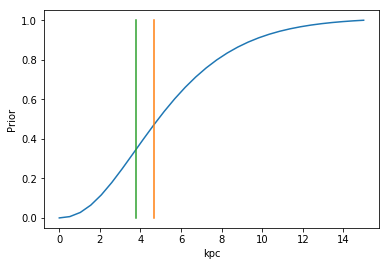

Oh Dear
30
19
9.8275862069
15
7.75862068966


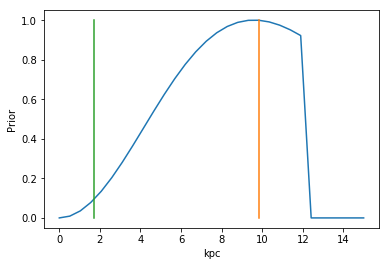

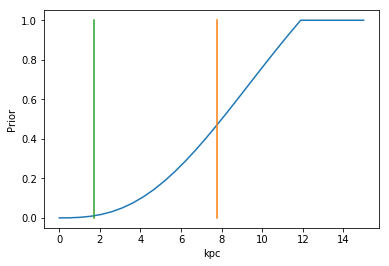

30
7
3.62068965517
9
4.65517241379


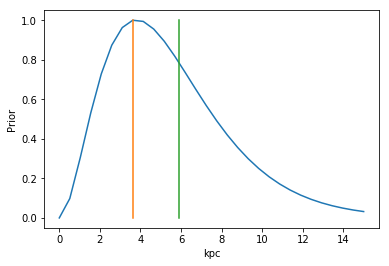

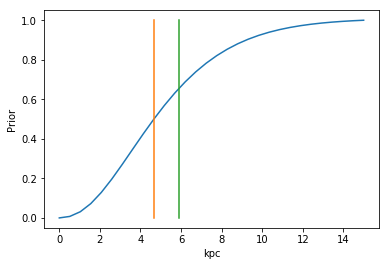

priors [4.6551724137931041, 3.6206896551724141] distance 2.49
priors [4.6551724137931041, 3.6206896551724141] distance 1.0599999
priors [4.6551724137931041, 4.1379310344827589] distance 3.8
priors [7.7586206896551726, 9.8275862068965516] distance 1.7
priors [4.6551724137931041, 3.6206896551724141] distance 5.9000001


In [52]:
for x in range(5):#coords)):
    c = SkyCoord(coords[x][0]+coords[x][1], unit=(u.hourangle, u.deg))
    c = SkyCoord(ra[x], dec[x], frame='icrs', unit='deg')
    gal = c.galactic
    #galcoords.append(gal)
    gall.append(gal.l.deg)
    galb.append(gal.b.deg)

priors = []
for x in range(5):#len(galb)):
    priors.append(newPrior(gall[x],galb[x],np.linspace(0.0,15,30),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


30
7
3.62068965517
9
4.65517241379


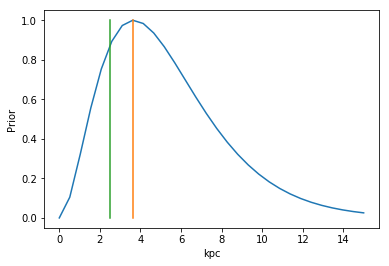

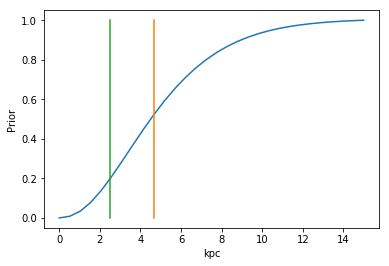

30
7
3.62068965517
9
4.65517241379


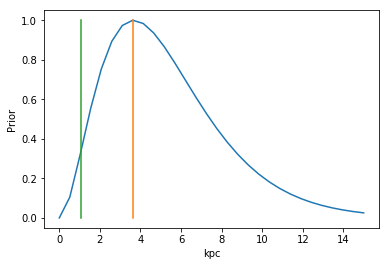

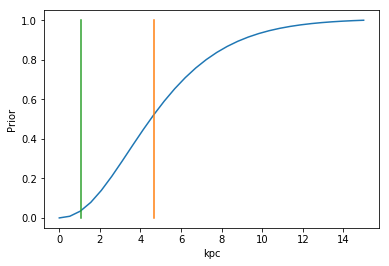

30
8
4.13793103448
9
4.65517241379


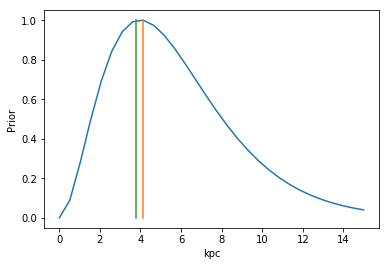

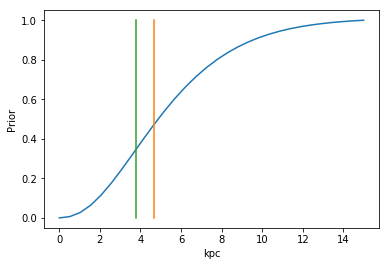

Oh Dear
30
19
9.8275862069
15
7.75862068966


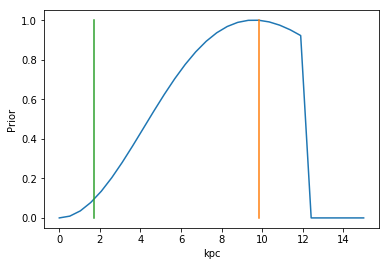

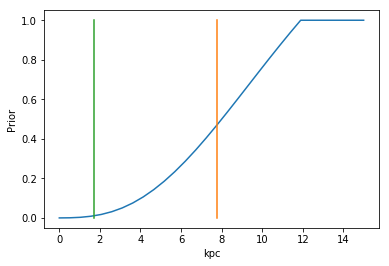

30
7
3.62068965517
9
4.65517241379


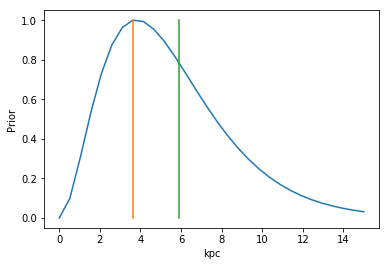

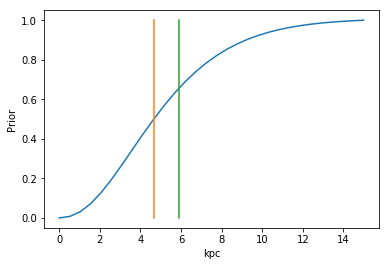

priors [4.6551724137931041, 3.6206896551724141] distance 2.49
priors [4.6551724137931041, 3.6206896551724141] distance 1.0599999
priors [4.6551724137931041, 4.1379310344827589] distance 3.8
priors [7.7586206896551726, 9.8275862068965516] distance 1.7
priors [4.6551724137931041, 3.6206896551724141] distance 5.9000001


In [53]:
priors = []
for x in range(5):#len(galb)):
    priors.append(newPriorNoSphere(gall[x],galb[x],np.linspace(0.0,15,30),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

30
7
3.62068965517
9
4.65517241379


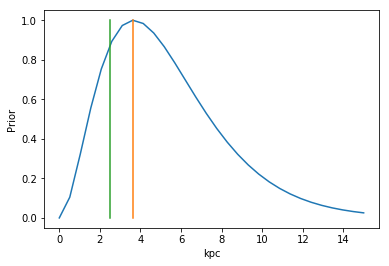

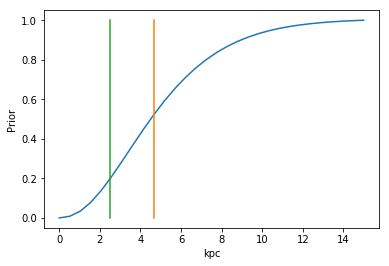

30
7
3.62068965517
9
4.65517241379


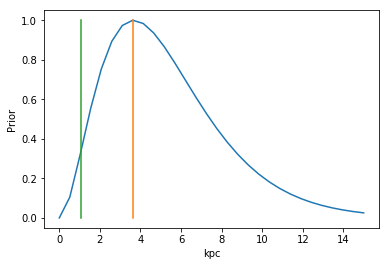

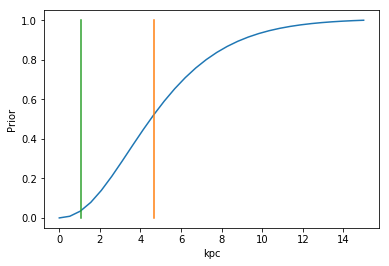

30
8
4.13793103448
9
4.65517241379


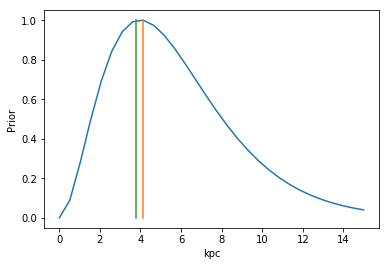

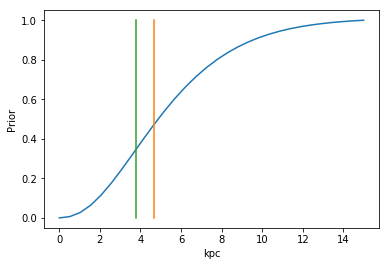

30
19
9.8275862069
18
9.31034482759


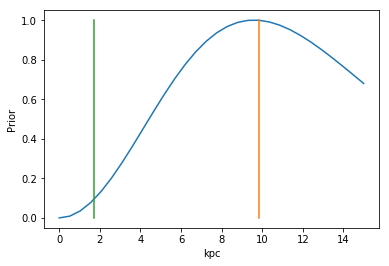

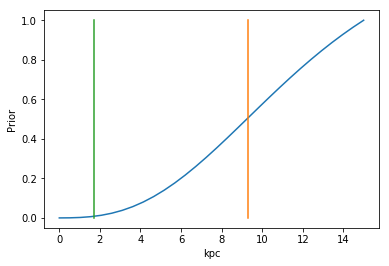

30
7
3.62068965517
9
4.65517241379


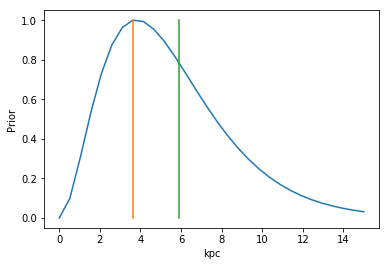

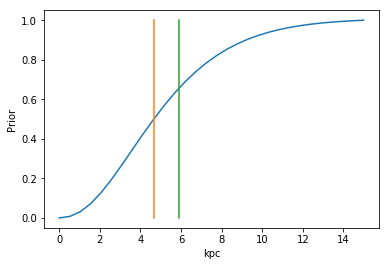

priors [4.6551724137931041, 3.6206896551724141] distance 2.49
priors [4.6551724137931041, 3.6206896551724141] distance 1.0599999
priors [4.6551724137931041, 4.1379310344827589] distance 3.8
priors [9.3103448275862082, 9.8275862068965516] distance 1.7
priors [4.6551724137931041, 3.6206896551724141] distance 5.9000001


In [54]:
priors = []
for x in range(5):#len(galb)):
    priors.append(newPriorNoMag(gall[x],galb[x],np.linspace(0.0,15,30),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


100
24
3.63636363636
31
4.69696969697


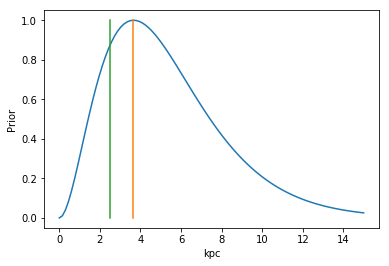

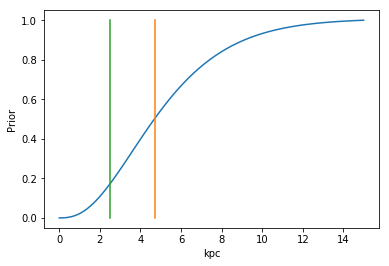

100
24
3.63636363636
31
4.69696969697


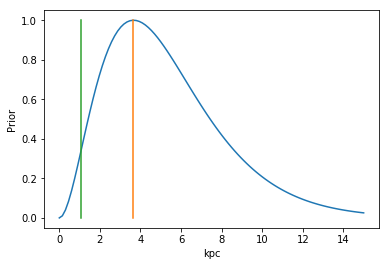

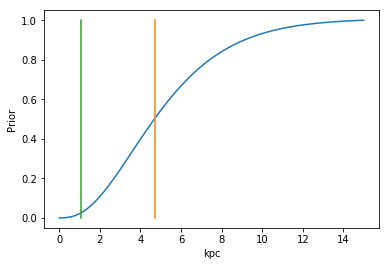

100
26
3.93939393939
33
5.0


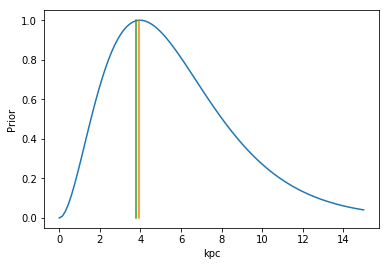

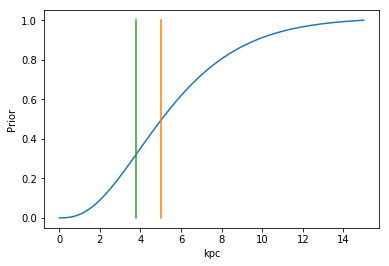

Oh Dear
100
63
9.54545454545
55
8.33333333333


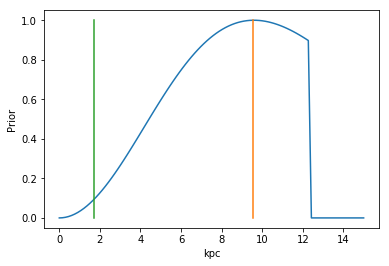

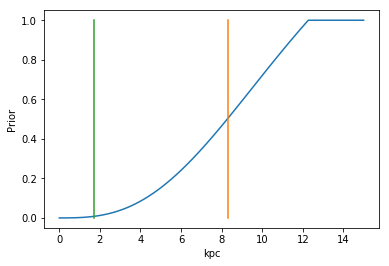

100
25
3.78787878788
32
4.84848484848


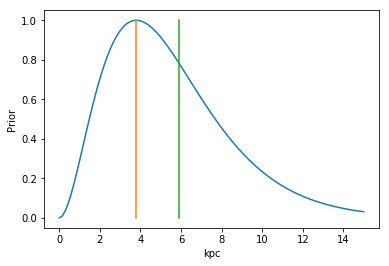

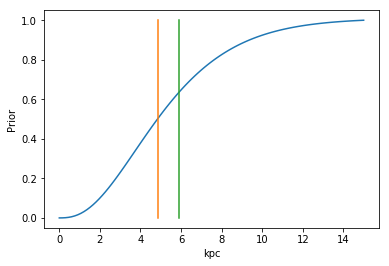

priors [4.6969696969696972, 3.6363636363636367] distance 2.49
priors [4.6969696969696972, 3.6363636363636367] distance 1.0599999
priors [5.0, 3.9393939393939394] distance 3.8
priors [8.3333333333333339, 9.545454545454545] distance 1.7
priors [4.8484848484848486, 3.7878787878787881] distance 5.9000001


In [55]:
for x in range(5):#coords)):
    c = SkyCoord(coords[x][0]+coords[x][1], unit=(u.hourangle, u.deg))
    gal = c.galactic
    #galcoords.append(gal)
    gall.append(gal.l.deg)
    galb.append(gal.b.deg)

priors = []
for x in range(5):#len(galb)):
    priors.append(newPrior(gall[x],galb[x],np.linspace(0.0,15,100),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


100
24
3.63636363636
31
4.69696969697


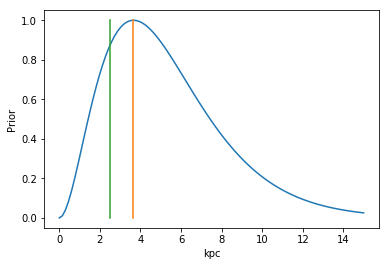

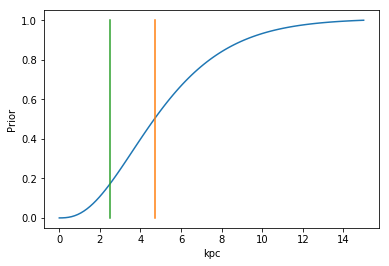

100
24
3.63636363636
31
4.69696969697


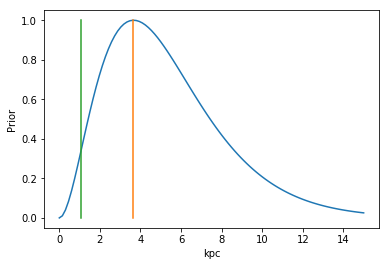

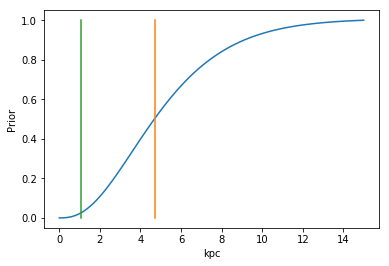

100
26
3.93939393939
33
5.0


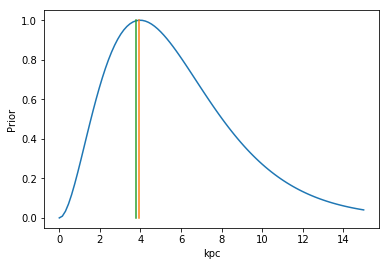

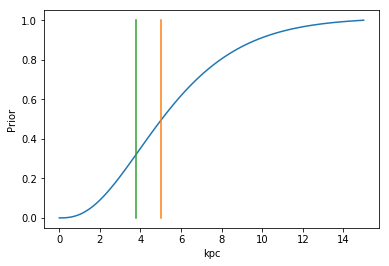

Oh Dear
100
63
9.54545454545
55
8.33333333333


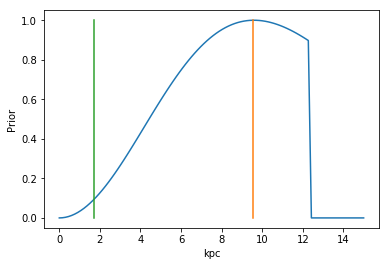

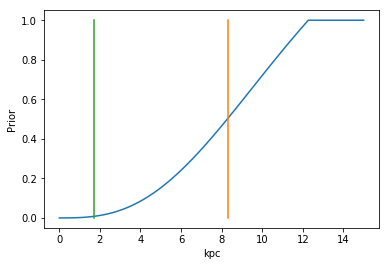

100
25
3.78787878788
32
4.84848484848


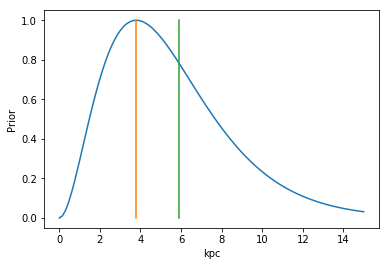

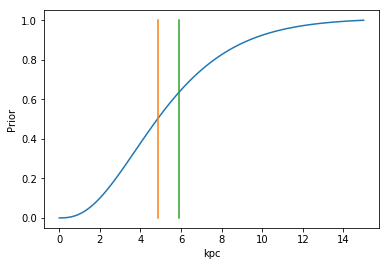

priors [4.6969696969696972, 3.6363636363636367] distance 2.49
priors [4.6969696969696972, 3.6363636363636367] distance 1.0599999
priors [5.0, 3.9393939393939394] distance 3.8
priors [8.3333333333333339, 9.545454545454545] distance 1.7
priors [4.8484848484848486, 3.7878787878787881] distance 5.9000001


In [56]:
priors = []
for x in range(5):#len(galb)):
    priors.append(newPriorNoSphere(gall[x],galb[x],np.linspace(0.0,15,100),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

100
24
3.63636363636
31
4.69696969697


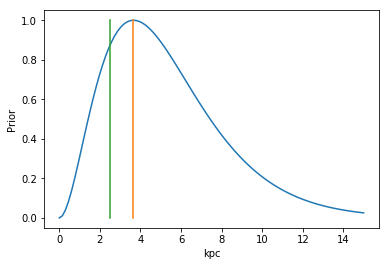

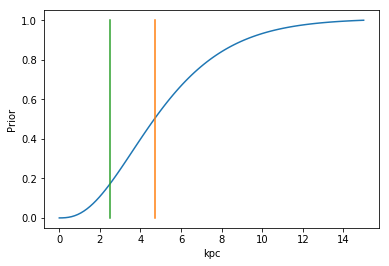

100
24
3.63636363636
31
4.69696969697


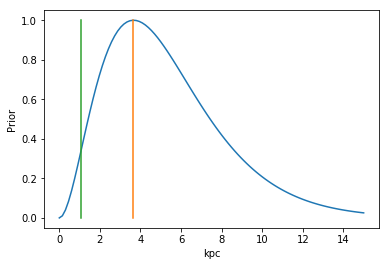

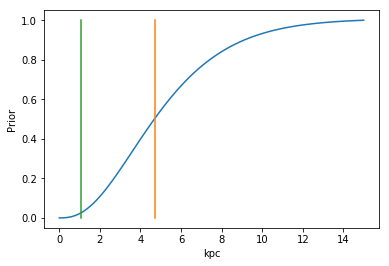

100
26
3.93939393939
33
5.0


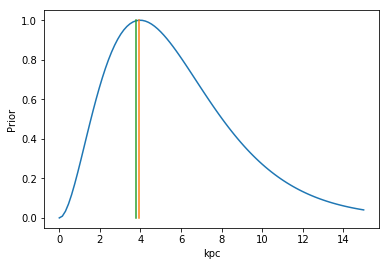

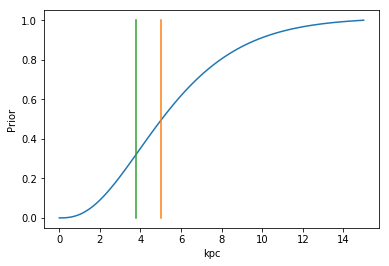

100
63
9.54545454545
62
9.39393939394


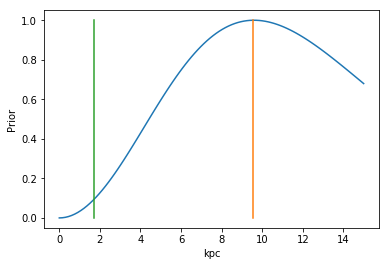

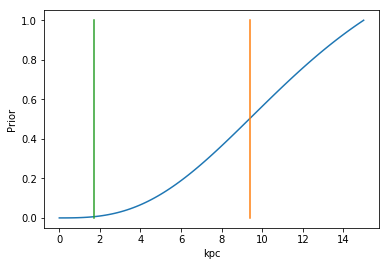

100
25
3.78787878788
32
4.84848484848


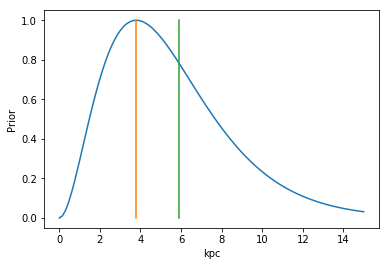

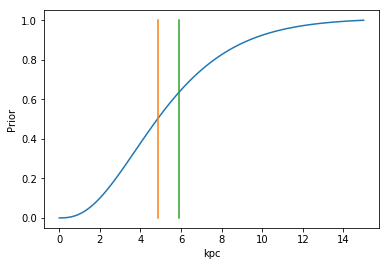

priors [4.6969696969696972, 3.6363636363636367] distance 2.49
priors [4.6969696969696972, 3.6363636363636367] distance 1.0599999
priors [5.0, 3.9393939393939394] distance 3.8
priors [9.3939393939393945, 9.545454545454545] distance 1.7
priors [4.8484848484848486, 3.7878787878787881] distance 5.9000001


In [57]:
priors = []
for x in range(5):#len(galb)):
    priors.append(newPriorNoMag(gall[x],galb[x],np.linspace(0.0,15,100),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

30
15
7.75862068966
15
7.75862068966


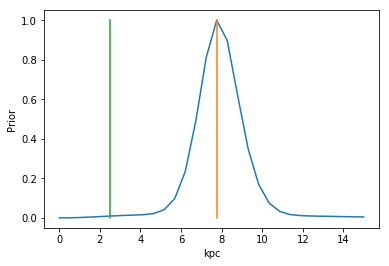

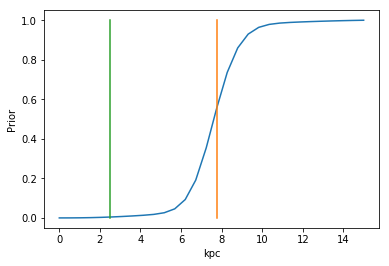

[7.7586206896551726, 7.7586206896551726]

In [59]:
newPriorNoMag(0,0,np.linspace(0.0,15,30),distList[0])